# Python Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(1)

* Normal random 500 data points for each cluster. Each cluster has mean of (2, 2), (8, 3), (3, 6) respectively
* Get covariance matrix for each cluster is `[[1, 0], [0, 1]]` to make sure each feature in each cluster will have variance of 1 and correlation between each feature will be ignored (0)

In [7]:
means = [[2, 2], [8, 3], [3, 6]]
cov = np.eye(2, dtype=np.int32)
N = 500

In [8]:
X0 = np.random.multivariate_normal(means[0], cov, N)

In [9]:
X0.shape

(500, 2)

In [10]:
np.cov(X0.T)

array([[ 0.95633384, -0.06654769],
       [-0.06654769,  0.97213483]])

In [11]:
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

* Add X0, X1 and X2 to the dataset

In [12]:
X = np.concatenate((X0, X1, X2), axis = 0)

In [24]:
X.shape

(1500, 2)

In [13]:
K = 3 # 3 clusters
original_label = np.array([0]*N + [1]*N + [2]*N)

In [19]:
original_label.shape

(1500,)

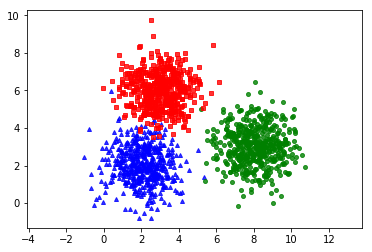

In [14]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

Centers found by scikit-learn:
[[ 8.0264726   3.01482006]
 [ 2.96418431  5.98014791]
 [ 2.04135427  2.00781399]]


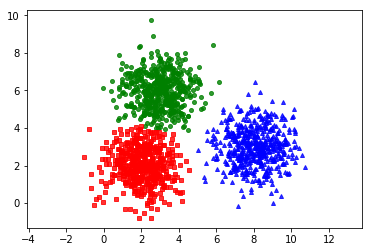

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

# KMeans Applications
## MNist
* MNist includes 2 dataset: training set has 60M and test set has 10M, all of them have label
![caption](http://res.cloudinary.com/dqagyeboj/image/upload/v1530881208/MNist_chap10_w4qzyi.png)
* Each gray image has 28 x 28 pixel
### Assumption classification problem
* Assume we don't know the label of each image, classify the image
* We can consider one data point as 784 x 1 and tile it to form the data set

In [52]:
from sklearn.datasets import fetch_mldata

# data_dir = 'Chapter10/MNist'
# mnist = fetch_mldata('MNIST original', data_home=data_dir)
# print("Shape of minst data: ", mnist.data.shape)

In [22]:
import pandas as pd

usecols = ['pixel' + str(i) for i in range(0, 784)]
mnist = pd.read_csv('Chapter10/MNist/train.csv', usecols=usecols)
mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Randomly choose 10000 data points from mnsit, implement KMeans

In [23]:
K = 10 # number 0 - 9
N = 10000
X = mnist.iloc[np.random.choice(mnist.shape[0], N), :]
kmeans = KMeans(n_clusters=K).fit(X)
pred_table = kmeans.predict(X)

![caption](http://res.cloudinary.com/dqagyeboj/image/upload/v1530885025/MNist_chap10_2_gluntv.png)
* Immage 10.5 show the centroid in the left and 20 random data points. We can see some error here, e.g. in row 4, centroid is the association of number 4, 7, 9
* The reason of this error is we get random data points from each cluster, so the data point may be so far from the centroid which this data point belongs to, although this centroid is the nearest that the data point can get
* One solution for this error is applying another KMeans in the row 4
* So rather than randomly choosing 20 data points, we get 20 data points nearest to the centroid they belong to, it is shown in Image 10.6

## Object Segmentation
<img src='https://scontent.fsgn3-1.fna.fbcdn.net/v/t31.0-8/15591631_1219980151402370_7459715426233631857_o.jpg?_nc_cat=0&oh=cbade030c2403e0b2065dfff33f9c3ce&oe=5BA06C52' width='360'>
* We can see some rule based here like red in the cover and lip, black in eyes, hair and background, skin color in other region, so here in this particular image, KMeans may be applicable
* When we apply KMeans, number of cluster may be 3

(-0.5, 2047.5, 1288.5, -0.5)

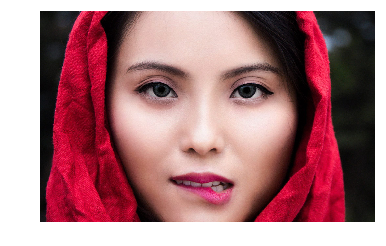

In [2]:
import matplotlib.image as mpimg

img = mpimg.imread('Chapter10/girl.jpg')
plt.imshow(img)
plt.axis('off')

In [3]:
X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
X.shape

(2639872, 3)

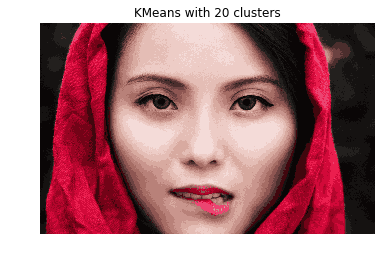

In [18]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    processed_img = np.zeros_like(X)
    for i in range(K):
        processed_img[label == i] = kmeans.cluster_centers_[i]

    processed_img = processed_img.reshape(img.shape[0], img.shape[1], img.shape[2])
    plt.title('KMeans with ' + str(K) + ' clusters')
    plt.imshow(processed_img, interpolation='nearest')
    plt.axis('off')

In [25]:
from urllib.request import urlretrieve

url = 'https://raw.githubusercontent.com/tiepvupsu/tiepvupsu.github.io/master/assets/kmeans/Kmeans2.ipynb'
urlretrieve(url, 'Kmeans2.ipynb')

('Kmeans2.ipynb', <http.client.HTTPMessage at 0x1776d3b95f8>)